<a href="https://colab.research.google.com/github/revanthkrishnasai00/Comprehensive-Analysis-of-the-Dynamics-and-Determinants-of-Rainfall-Patterns/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Step 1: Upgrade pip, setuptools, and wheel
!pip install --upgrade pip setuptools wheel

# Step 2: Clear pip cache to avoid any cache-related issues
!pip cache purge

# Step 3: Install a specific version of tensorflow-gpu
!pip install tensorflow-gpu==2.9.0


Files removed: 6


In [28]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [29]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
## divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [32]:
# Convert the boolean values to integers (0 and 1)
geography = pd.get_dummies(X['Geography'], drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'], drop_first=True).astype(int)


In [33]:
#concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [34]:
X=pd.concat([X,geography,gender],axis=1)

In [35]:
##splitting the dataset into training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
X_train.shape

(8000, 11)

In [38]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [39]:
## part2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [40]:
## Lets initialize the ANN
classifier = Sequential()

In [41]:
##Adding the input layer
classifier.add(Dense(units=11,activation='relu'))


In [61]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [62]:
## adding the secound hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [63]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [64]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [65]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [66]:

 ##early stopping keras
import keras
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [67]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4548 - accuracy: 0.7955 - val_loss: 0.4098 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4152 - accuracy: 0.7962 - val_loss: 0.3900 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4063 - accuracy: 0.7962 - val_loss: 0.3886 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4108 - accuracy: 0.7962 - val_loss: 0.3937 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.7949 - val_loss: 0.4010 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4029 - accuracy: 0.7962 - val_loss: 0.3843 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.7975 - val_loss: 0.3915 - val_accuracy:

In [68]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

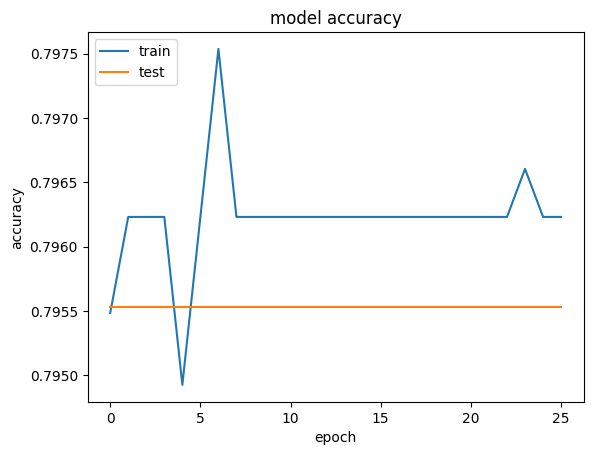

In [69]:
## summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [70]:
## part 3 - Making the predictions and evaluating the model

# predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)


63/63 [==============================] - 0s 1ms/step


In [71]:
## make the condusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[1595,    0],
       [ 405,    0]])

In [72]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975

In [73]:
##get the weights
classifier.get_weights()

[array([[-4.86157298e-01, -7.92524338e-01,  2.34039879e+00,
         -6.82976961e-01, -9.89433289e-01, -1.52666837e-01,
         -2.78096944e-01, -3.67088616e-01,  1.52525026e-05,
          1.60598293e-01, -7.63051093e-01],
        [ 2.93678021e+00,  4.18607330e+00, -1.63866889e+00,
         -4.51100856e-01,  8.33603024e-01, -1.22444078e-01,
          2.94604397e+00,  1.31079626e+00, -5.39938867e-01,
         -3.91019654e+00, -3.86641717e+00],
        [ 4.36423957e-01, -1.96610838e-01, -2.37225339e-01,
          1.11508942e+00, -4.98438001e-01,  9.49221849e-01,
          3.36459398e-01,  6.61014855e-01, -3.57891053e-01,
         -8.59784901e-01,  9.26012397e-01],
        [-1.77111375e+00,  1.97893586e-02, -2.05053020e+00,
         -2.20087552e+00,  1.15212965e+00, -1.34483087e+00,
          1.38936400e-01, -4.20292330e+00, -1.84968078e+00,
         -1.62117243e+00,  8.65854025e-02],
        [ 1.17812715e-01, -2.20915461e+00,  6.65170491e-01,
         -4.00815308e-01,  3.74454045e+00,  